In [136]:
import pandas as pd
from sklearn import neighbors
from sklearn import tree
from sklearn import ensemble
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest, SelectPercentile
import matplotlib.pyplot as plt
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
from numpy import *
import matplotlib.pyplot as plt

In [2]:
# pair 1
dataHK = pd.read_csv("HK.csv")
# pair 2
dataMY = pd.read_csv("MY.csv")
# pair 3
dataAB = pd.read_csv("AB.csv")

In [3]:
feature_names = ['x-box','y-box','width','high','onpix','x-bar','y-bar','x2bar','y2bar','xybar','x2ybr','xy2br','x-ege','xegvy','y-ege','yegvx']

In [4]:
dataHK.head()

,lettr,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,H,4,5,5,4,4,7,7,6,6,7,6,8,3,8,3,8
1,H,6,9,8,7,6,8,6,6,7,7,7,9,6,8,4,8
2,H,3,3,4,1,2,8,7,5,6,7,6,8,5,8,3,7
3,H,3,5,5,4,3,7,8,3,6,10,6,8,3,8,3,8
4,H,8,12,8,6,4,9,8,4,5,8,4,5,6,9,5,9


In [5]:
dataMY.head()

,lettr,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,M,11,15,13,9,7,13,2,6,2,12,1,9,8,1,1,8
1,M,6,9,8,6,9,7,8,6,5,7,5,8,8,9,8,6
2,M,7,11,11,8,9,3,8,4,5,10,11,10,10,9,5,7
3,M,6,9,9,7,6,5,6,3,5,10,9,9,8,5,2,7
4,Y,7,11,9,8,8,9,5,6,4,7,8,8,3,9,8,3


In [6]:
dataAB.head()

,lettr,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,B,4,2,5,4,4,8,7,6,6,7,6,6,2,8,7,10
1,A,1,1,3,2,1,8,2,2,2,8,2,8,1,6,2,7
2,B,5,9,7,7,10,9,8,4,4,6,8,6,6,11,8,7
3,A,3,7,5,5,3,12,2,3,2,10,2,9,2,6,3,8
4,A,3,8,5,6,3,9,2,2,3,8,2,8,2,6,3,7


In [7]:
dataHK.describe()

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
count,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000
mean,4.420910,7.083503,5.865580,5.283775,4.116768,6.465716,7.194840,5.257977,4.805838,8.131704,6.052953,8.820774,3.946368,7.873048,3.589952,8.340122
std,1.900914,3.320793,2.207538,2.192406,2.186905,1.807389,1.042924,3.751084,2.232795,1.597053,1.877330,1.596677,1.450441,1.009890,2.201520,1.599210
min,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,4.000000,1.000000,0.000000,5.000000,1.000000,4.000000,2.000000,2.000000,0.000000,3.000000
25%,3.000000,5.000000,4.000000,4.000000,2.000000,5.000000,7.000000,3.000000,3.000000,7.000000,5.000000,8.000000,3.000000,8.000000,3.000000,7.000000
50%,4.000000,7.000000,6.000000,6.000000,4.000000,7.000000,7.000000,4.000000,6.000000,7.000000,6.000000,8.000000,3.000000,8.000000,3.000000,8.000000
75%,5.000000,9.000000,7.000000,7.000000,6.000000,8.000000,8.000000,7.000000,7.000000,10.000000,7.000000,10.000000,5.000000,8.000000,5.000000,9.000000
max,12.000000,15.000000,12.000000,10.000000,11.000000,11.000000,12.000000,15.000000,9.000000,12.000000,12.000000,13.000000,10.000000,12.000000,11.000000,14.000000


In [8]:
dataMY.describe()

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
count,1578.000000,1578.000000,1578.000000,1578.000000,1578.000000,1578.000000,1578.000000,1578.000000,1578.000000,1578.000000,1578.000000,1578.000000,1578.000000,1578.000000,1578.000000,1578.000000
mean,4.539924,6.830798,5.946768,5.505070,4.166667,7.041191,7.946134,4.326996,3.996831,7.687579,8.673004,7.643853,5.153992,8.364385,2.439797,6.939163
std,2.106244,3.268945,2.240676,2.502308,2.813272,1.997831,2.199674,3.179802,2.114506,1.979440,2.707849,1.430673,3.499215,2.645569,2.333455,1.668113
min,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,1.000000,4.000000,0.000000,0.000000,0.000000,2.000000
25%,3.000000,5.000000,4.000000,4.000000,2.000000,6.000000,6.000000,2.000000,2.000000,6.000000,7.000000,7.000000,1.000000,6.000000,0.000000,6.000000
50%,4.000000,7.000000,6.000000,6.000000,4.000000,7.000000,7.000000,3.000000,4.000000,7.000000,9.000000,8.000000,6.000000,9.000000,2.000000,8.000000
75%,6.000000,9.000000,7.000000,7.000000,6.000000,8.000000,10.000000,6.000000,5.000000,9.000000,11.000000,8.000000,8.000000,11.000000,3.000000,8.000000
max,15.000000,15.000000,15.000000,15.000000,15.000000,14.000000,13.000000,13.000000,10.000000,14.000000,13.000000,13.000000,15.000000,14.000000,12.000000,12.000000


In [9]:
dataAB.describe()

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
count,1555.000000,1555.000000,1555.000000,1555.000000,1555.000000,1555.000000,1555.000000,1555.000000,1555.00000,1555.000000,1555.000000,1555.000000,1555.000000,1555.000000,1555.000000,1555.000000
mean,3.656592,6.969132,5.108682,5.174277,3.781994,8.270096,5.321543,4.041801,3.78135,7.877170,3.899035,7.572347,2.942122,7.108682,4.716399,8.272669
std,1.710107,3.371899,1.736250,2.195082,2.159218,1.732898,2.247153,2.194864,2.12051,1.701226,2.170522,1.393728,1.618107,1.347249,2.481324,1.614842
min,0.000000,0.000000,1.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.00000,3.000000,0.000000,5.000000,1.000000,1.000000,0.000000,1.000000
25%,2.000000,4.000000,4.000000,4.000000,2.000000,7.000000,3.000000,2.000000,2.00000,7.000000,2.000000,7.000000,2.000000,6.000000,3.000000,7.000000
50%,3.000000,7.000000,5.000000,5.000000,3.000000,8.000000,6.000000,3.000000,4.00000,7.000000,4.000000,8.000000,2.000000,7.000000,5.000000,8.000000
75%,5.000000,9.000000,6.000000,7.000000,5.000000,9.000000,7.000000,5.000000,6.00000,9.000000,6.000000,8.000000,3.000000,8.000000,7.000000,9.000000
max,11.000000,15.000000,11.000000,9.000000,12.000000,14.000000,10.000000,10.000000,8.00000,12.000000,9.000000,14.000000,9.000000,12.000000,12.000000,12.000000


# A) Data preprocessing

In [10]:
# train:test:validation = 7:2:1
# number of data → HK: 1473, MY: 1578, AB: 1555

# for pair 1
xHK = dataHK.iloc[:, 1:]
yHK = dataHK.iloc[:, 0]
xHKtrain = dataHK.iloc[0:1031, 1:]
xHKtest = dataHK.iloc[1031:1325, 1:]
xHKvalidation = dataHK.iloc[1325:, 1:]
yHKtrain = dataHK.iloc[0:1031, 0]
yHKtest = dataHK.iloc[1031:1325, 0]
yHKvalidation = dataHK.iloc[1325:, 0]

# for pair 2
xMY = dataMY.iloc[:, 1:]
yMY = dataMY.iloc[:, 0]
xMYtrain = dataMY.iloc[0:1104, 1:]
xMYtest = dataMY.iloc[1104:1420, 1:]
xMYvalidation = dataMY.iloc[1420:, 1:]
yMYtrain = dataMY.iloc[0:1104, 0]
yMYtest = dataMY.iloc[1104:1420, 0]
yMYvalidation = dataMY.iloc[1420:, 0]

# for pair 3
xAB = dataAB.iloc[:, 1:]
yAB = dataAB.iloc[:, 0]
xABtrain = dataAB.iloc[0:1088, 1:]
xABtest = dataAB.iloc[1088:1399, 1:]
xABvalidation = dataAB.iloc[1399:, 1:]
yABtrain = dataAB.iloc[0:1088, 0]
yABtest = dataAB.iloc[1088:1399, 0]
yABvalidation = dataAB.iloc[1399:, 0]

In [11]:
xHK.shape

(1473, 16)

In [12]:
yHK.shape

(1473,)

# B) Model fitting

## 1. k-nearest neighbors

In [230]:
knn = neighbors.KNeighborsClassifier(n_neighbors=7, weights='distance',algorithm='auto', leaf_size=50, p=2)
print('k-nearest neighbors results')
print(' ')
# for pair 1
print('Accuracy of Pair 1 using 5-fold cross-validation:')
print(cross_val_score(knn, xHKtrain, yHKtrain, cv=5, scoring='accuracy'))
print('mean is: ', mean(cross_val_score(knn, xHKtrain, yHKtrain, cv=5, scoring='accuracy')))
print('===================================================')

# for pair 2
print('Accuracy of Pair 2 using 5-fold cross-validation:')
print(cross_val_score(knn, xMYtrain, yMYtrain, cv=5, scoring='accuracy'))
print('mean is: ', mean(cross_val_score(knn, xMYtrain, yMYtrain, cv=5, scoring='accuracy')))
print('===================================================')

# for pair 3
print('Accuracy of Pair 3 using 5-fold cross-validation:')
print(cross_val_score(knn, xABtrain, yABtrain, cv=5, scoring='accuracy'))
print('mean is: ', mean(cross_val_score(knn, xABtrain, yABtrain, cv=5, scoring='accuracy')))

k-nearest neighbors results
 
Accuracy of Pair 1 using 5-fold cross-validation:
[0.96135266 0.97087379 0.92718447 0.93203883 0.91747573]
mean is:  0.9417850945077623
Accuracy of Pair 2 using 5-fold cross-validation:
[1.         1.         1.         1.         0.99545455]
mean is:  0.999090909090909
Accuracy of Pair 3 using 5-fold cross-validation:
[1.         1.         1.         0.99539171 0.99539171]
mean is:  0.9981566820276498


In [231]:
#validation
print('hk ',mean(cross_val_score(knn, xHKvalidation, yHKvalidation, cv=5, scoring='accuracy')))
print('my ',mean(cross_val_score(knn, xMYvalidation, yMYvalidation, cv=5, scoring='accuracy')))
print('ab ',mean(cross_val_score(knn, xABvalidation, yABvalidation, cv=5, scoring='accuracy')))

hk  0.8245977011494252
my  0.9875
ab  0.955241935483871


In [155]:
a, b, c = [], [], []
y = [m for m in range(1,31)]
for i in range(1, 31):
    knn = neighbors.KNeighborsClassifier(n_neighbors=i)
    a.append(mean(cross_val_score(knn, xHKtrain, yHKtrain, cv=5, scoring='accuracy')))
    b.append(mean(cross_val_score(knn, xMYtrain, yMYtrain, cv=5, scoring='accuracy')))
    c.append(mean(cross_val_score(knn, xABtrain, yABtrain, cv=5, scoring='accuracy')))

In [156]:
d, e, f = [], [], []
y1 = [m for m in range(1,101, 10)]
for i in range(1, 101, 10):
    knn = neighbors.KNeighborsClassifier(leaf_size=i)
    d.append(mean(cross_val_score(knn, xHKtrain, yHKtrain, cv=5, scoring='accuracy')))
    e.append(mean(cross_val_score(knn, xMYtrain, yMYtrain, cv=5, scoring='accuracy')))
    f.append(mean(cross_val_score(knn, xABtrain, yABtrain, cv=5, scoring='accuracy')))

In [157]:
g, h, n = [], [], []
y2 = [m for m in range(1,11)]
for i in range(1, 11):
    knn = neighbors.KNeighborsClassifier(p=i)
    g.append(mean(cross_val_score(knn, xHKtrain, yHKtrain, cv=5, scoring='accuracy')))
    h.append(mean(cross_val_score(knn, xMYtrain, yMYtrain, cv=5, scoring='accuracy')))
    n.append(mean(cross_val_score(knn, xABtrain, yABtrain, cv=5, scoring='accuracy')))

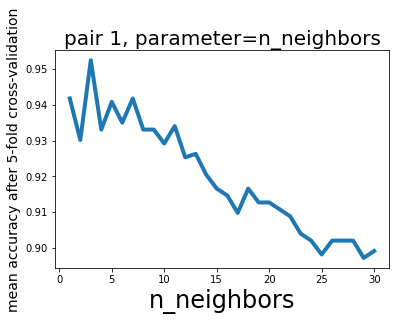

In [158]:
plt.plot(y, a, linewidth=4)
plt.title("pair 1, parameter=n_neighbors", fontsize=20)
plt.xlabel("n_neighbors", fontsize=24)
plt.ylabel("mean accuracy after 5-fold cross-validation", fontsize=14)
# plt.tick_params(axis='both',
# labelsize=10)
plt.show()

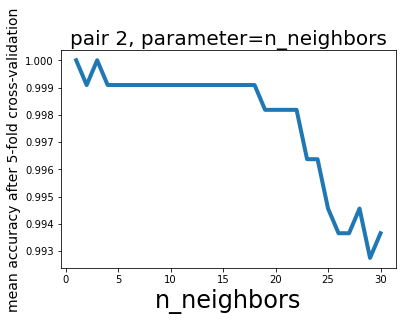

In [159]:
plt.plot(y, b, linewidth=4)
plt.title("pair 2, parameter=n_neighbors", fontsize=20)
plt.xlabel("n_neighbors", fontsize=24)
plt.ylabel("mean accuracy after 5-fold cross-validation", fontsize=14)
# plt.tick_params(axis='both',
# labelsize=10)
plt.show()

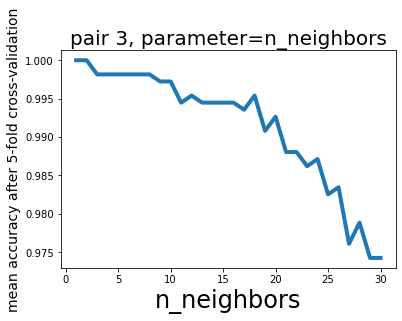

In [160]:
plt.plot(y, c, linewidth=4)
plt.title("pair 3, parameter=n_neighbors", fontsize=20)
plt.xlabel("n_neighbors", fontsize=24)
plt.ylabel("mean accuracy after 5-fold cross-validation", fontsize=14)
# plt.tick_params(axis='both',
# labelsize=10)
plt.show()

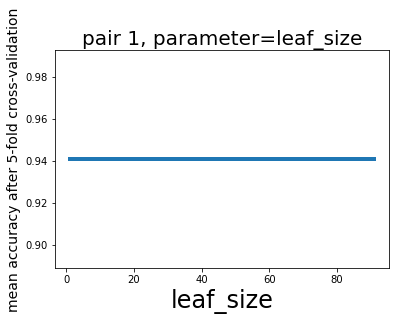

In [161]:
plt.plot(y1, d, linewidth=4)
plt.title("pair 1, parameter=leaf_size", fontsize=20)
plt.xlabel("leaf_size", fontsize=24)
plt.ylabel("mean accuracy after 5-fold cross-validation", fontsize=14)
# plt.tick_params(axis='both',
# labelsize=10)
plt.show()

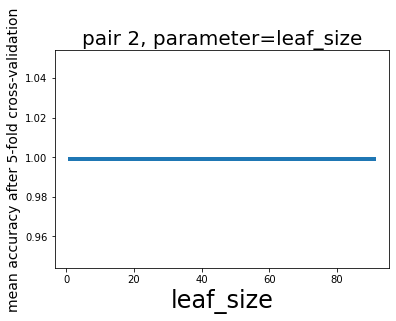

In [165]:
plt.plot(y1, e, linewidth=4)
plt.title("pair 2, parameter=leaf_size", fontsize=20)
plt.xlabel("leaf_size", fontsize=24)
plt.ylabel("mean accuracy after 5-fold cross-validation", fontsize=14)
# plt.tick_params(axis='both',
# labelsize=10)
plt.show()

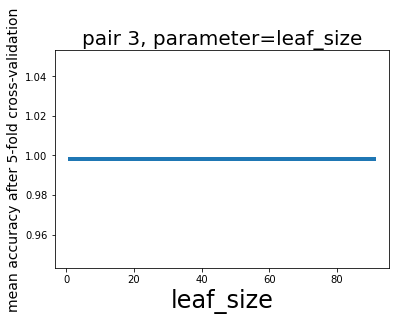

In [166]:
plt.plot(y1, f, linewidth=4)
plt.title("pair 3, parameter=leaf_size", fontsize=20)
plt.xlabel("leaf_size", fontsize=24)
plt.ylabel("mean accuracy after 5-fold cross-validation", fontsize=14)
# plt.tick_params(axis='both',
# labelsize=10)
plt.show()

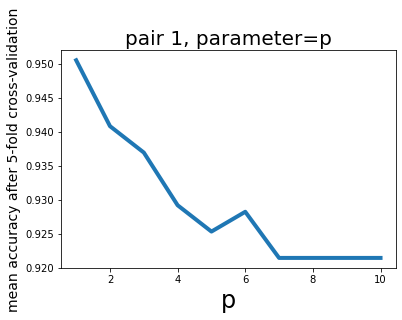

In [167]:
plt.plot(y2, g, linewidth=4)
plt.title("pair 1, parameter=p", fontsize=20)
plt.xlabel("p", fontsize=24)
plt.ylabel("mean accuracy after 5-fold cross-validation", fontsize=14)
# plt.tick_params(axis='both',
# labelsize=10)
plt.show()

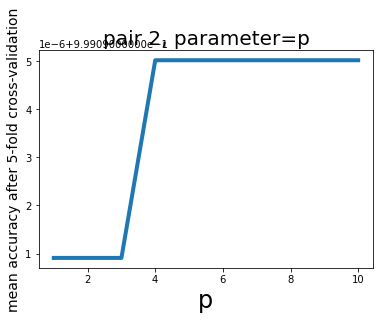

In [168]:
plt.plot(y2, h, linewidth=4)
plt.title("pair 2, parameter=p", fontsize=20)
plt.xlabel("p", fontsize=24)
plt.ylabel("mean accuracy after 5-fold cross-validation", fontsize=14)
# plt.tick_params(axis='both',
# labelsize=10)
plt.show()

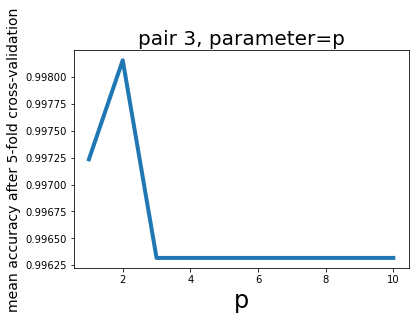

In [169]:
plt.plot(y2, n, linewidth=4)
plt.title("pair 3, parameter=p", fontsize=20)
plt.xlabel("p", fontsize=24)
plt.ylabel("mean accuracy after 5-fold cross-validation", fontsize=14)
# plt.tick_params(axis='both',
# labelsize=10)
plt.show()

## 2. decision tree

In [232]:
dt = tree.DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=22, min_samples_split=4, 
                                 min_samples_leaf=1, max_leaf_nodes=145)
print('decision tree results')
print(' ')
# for pair 1
print('Accuracy of Pair 1 using 5-fold cross-validation:')
print(cross_val_score(dt, xHKtrain, yHKtrain, cv=5, scoring='accuracy'))
print('mean is: ', mean(cross_val_score(dt, xHKtrain, yHKtrain, cv=5, scoring='accuracy')))
print('===================================================')

# for pair 2
print('Accuracy of Pair 2 using 5-fold cross-validation:')
print(cross_val_score(dt, xMYtrain, yMYtrain, cv=5, scoring='accuracy'))
print('mean is: ', mean(cross_val_score(dt, xMYtrain, yMYtrain, cv=5, scoring='accuracy')))
print('===================================================')

# for pair 3
print('Accuracy of Pair 3 using 5-fold cross-validation:')
print(cross_val_score(dt, xABtrain, yABtrain, cv=5, scoring='accuracy'))
print('mean is: ', mean(cross_val_score(dt, xABtrain, yABtrain, cv=5, scoring='accuracy')))

decision tree results
 
Accuracy of Pair 1 using 5-fold cross-validation:
[0.9178744  0.9368932  0.92718447 0.91262136 0.94174757]
mean is:  0.9389053046292387
Accuracy of Pair 2 using 5-fold cross-validation:
[0.99095023 0.99095023 0.99095023 0.97737557 0.96818182]
mean is:  0.9836857260386672
Accuracy of Pair 3 using 5-fold cross-validation:
[0.98165138 0.98623853 0.98165138 0.99539171 0.97695853]
mean is:  0.9797742358263222


In [233]:
#validation
print('hk ',mean(cross_val_score(dt, xHKvalidation, yHKvalidation, cv=5, scoring='accuracy')))
print('my ',mean(cross_val_score(dt, xMYvalidation, yMYvalidation, cv=5, scoring='accuracy')))
print('ab ',mean(cross_val_score(dt, xABvalidation, yABvalidation, cv=5, scoring='accuracy')))

hk  0.8372413793103449
my  0.98125
ab  0.9358870967741936


In [170]:
a, b, c = [], [], []
y = [m for m in range(1,31)]
for i in range(1, 31):
    dt = tree.DecisionTreeClassifier(max_depth=i)
    a.append(mean(cross_val_score(dt, xHKtrain, yHKtrain, cv=5, scoring='accuracy')))
    b.append(mean(cross_val_score(dt, xMYtrain, yMYtrain, cv=5, scoring='accuracy')))
    c.append(mean(cross_val_score(dt, xABtrain, yABtrain, cv=5, scoring='accuracy')))

In [171]:
d, e, f = [], [], []
y1 = [m for m in range(1,31)]
for i in range(1, 31):
    dt = tree.DecisionTreeClassifier(min_samples_split=i)
    d.append(mean(cross_val_score(dt, xHKtrain, yHKtrain, cv=5, scoring='accuracy')))
    e.append(mean(cross_val_score(dt, xMYtrain, yMYtrain, cv=5, scoring='accuracy')))
    f.append(mean(cross_val_score(dt, xABtrain, yABtrain, cv=5, scoring='accuracy')))

/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 903, in fit
    super().fit(
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 238, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The s

In [172]:
g, h, n = [], [], []
y2 = [m for m in range(1,31)]
for i in range(1, 31):
    dt = tree.DecisionTreeClassifier(min_samples_leaf=i)
    g.append(mean(cross_val_score(dt, xHKtrain, yHKtrain, cv=5, scoring='accuracy')))
    h.append(mean(cross_val_score(dt, xMYtrain, yMYtrain, cv=5, scoring='accuracy')))
    n.append(mean(cross_val_score(dt, xABtrain, yABtrain, cv=5, scoring='accuracy')))

In [173]:
j, k, l = [], [], []
y3 = [m for m in range(50, 151, 10)]
for i in range(50, 151, 10):
    dt = tree.DecisionTreeClassifier(max_leaf_nodes=i)
    j.append(mean(cross_val_score(dt, xHKtrain, yHKtrain, cv=5, scoring='accuracy')))
    k.append(mean(cross_val_score(dt, xMYtrain, yMYtrain, cv=5, scoring='accuracy')))
    l.append(mean(cross_val_score(dt, xABtrain, yABtrain, cv=5, scoring='accuracy')))

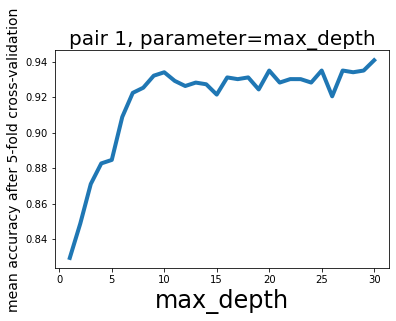

In [174]:
plt.plot(y, a, linewidth=4)
plt.title("pair 1, parameter=max_depth", fontsize=20)
plt.xlabel("max_depth", fontsize=24)
plt.ylabel("mean accuracy after 5-fold cross-validation", fontsize=14)
# plt.tick_params(axis='both',
# labelsize=10)
plt.show()

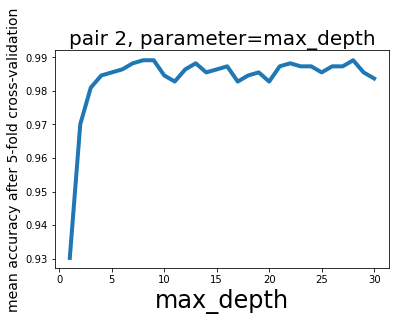

In [175]:
plt.plot(y, b, linewidth=4)
plt.title("pair 2, parameter=max_depth", fontsize=20)
plt.xlabel("max_depth", fontsize=24)
plt.ylabel("mean accuracy after 5-fold cross-validation", fontsize=14)
# plt.tick_params(axis='both',
# labelsize=10)
plt.show()

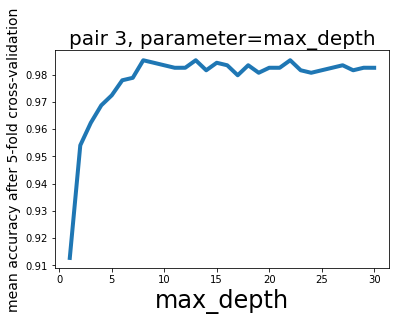

In [176]:
plt.plot(y, c, linewidth=4)
plt.title("pair 3, parameter=max_depth", fontsize=20)
plt.xlabel("max_depth", fontsize=24)
plt.ylabel("mean accuracy after 5-fold cross-validation", fontsize=14)
# plt.tick_params(axis='both',
# labelsize=10)
plt.show()

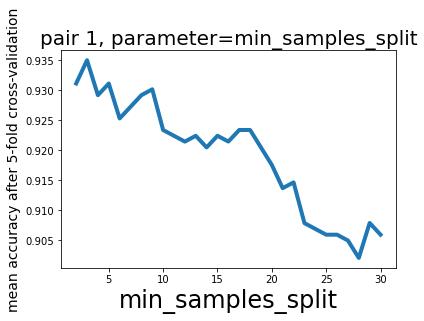

In [177]:
plt.plot(y1, d, linewidth=4)
plt.title("pair 1, parameter=min_samples_split", fontsize=20)
plt.xlabel("min_samples_split", fontsize=24)
plt.ylabel("mean accuracy after 5-fold cross-validation", fontsize=14)
# plt.tick_params(axis='both',
# labelsize=10)
plt.show()

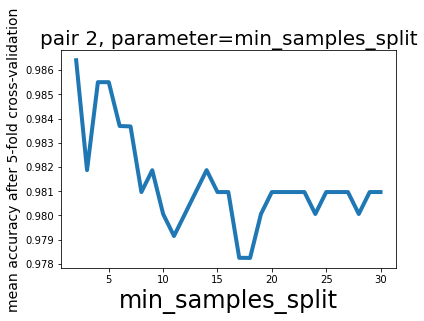

In [178]:
plt.plot(y1, e, linewidth=4)
plt.title("pair 2, parameter=min_samples_split", fontsize=20)
plt.xlabel("min_samples_split", fontsize=24)
plt.ylabel("mean accuracy after 5-fold cross-validation", fontsize=14)
# plt.tick_params(axis='both',
# labelsize=10)
plt.show()

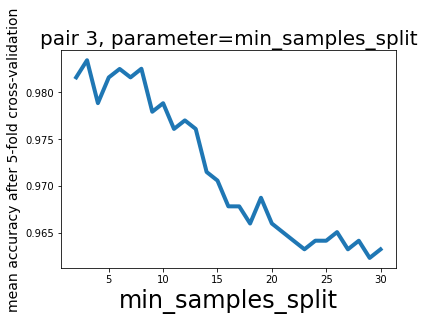

In [179]:
plt.plot(y1, f, linewidth=4)
plt.title("pair 3, parameter=min_samples_split", fontsize=20)
plt.xlabel("min_samples_split", fontsize=24)
plt.ylabel("mean accuracy after 5-fold cross-validation", fontsize=14)
# plt.tick_params(axis='both',
# labelsize=10)
plt.show()

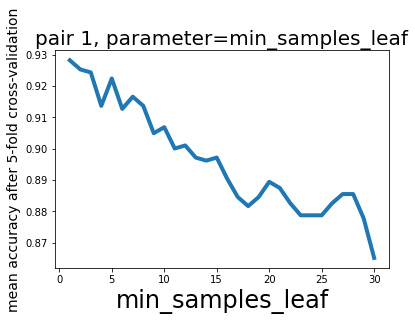

In [180]:
plt.plot(y2, g, linewidth=4)
plt.title("pair 1, parameter=min_samples_leaf", fontsize=20)
plt.xlabel("min_samples_leaf", fontsize=24)
plt.ylabel("mean accuracy after 5-fold cross-validation", fontsize=14)
# plt.tick_params(axis='both',
# labelsize=10)
plt.show()

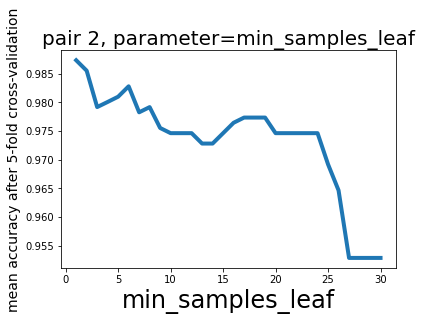

In [181]:
plt.plot(y2, h, linewidth=4)
plt.title("pair 2, parameter=min_samples_leaf", fontsize=20)
plt.xlabel("min_samples_leaf", fontsize=24)
plt.ylabel("mean accuracy after 5-fold cross-validation", fontsize=14)
# plt.tick_params(axis='both',
# labelsize=10)
plt.show()

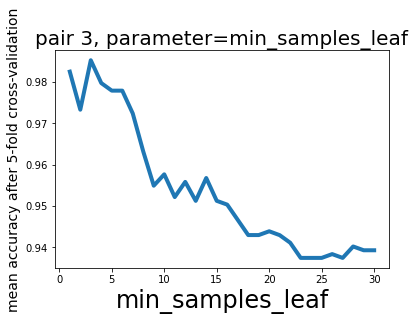

In [182]:
plt.plot(y2, n, linewidth=4)
plt.title("pair 3, parameter=min_samples_leaf", fontsize=20)
plt.xlabel("min_samples_leaf", fontsize=24)
plt.ylabel("mean accuracy after 5-fold cross-validation", fontsize=14)
# plt.tick_params(axis='both',
# labelsize=10)
plt.show()

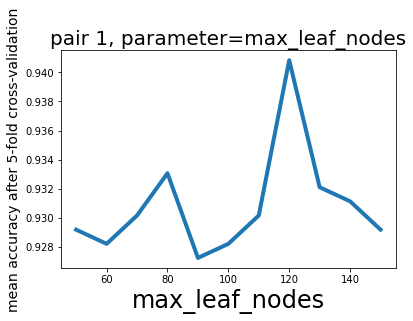

In [183]:
plt.plot(y3, j, linewidth=4)
plt.title("pair 1, parameter=max_leaf_nodes", fontsize=20)
plt.xlabel("max_leaf_nodes", fontsize=24)
plt.ylabel("mean accuracy after 5-fold cross-validation", fontsize=14)
# plt.tick_params(axis='both',
# labelsize=10)
plt.show()

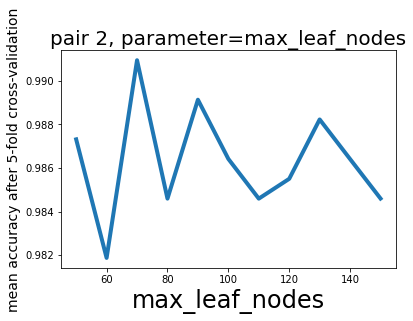

In [184]:
plt.plot(y3, k, linewidth=4)
plt.title("pair 2, parameter=max_leaf_nodes", fontsize=20)
plt.xlabel("max_leaf_nodes", fontsize=24)
plt.ylabel("mean accuracy after 5-fold cross-validation", fontsize=14)
# plt.tick_params(axis='both',
# labelsize=10)
plt.show()

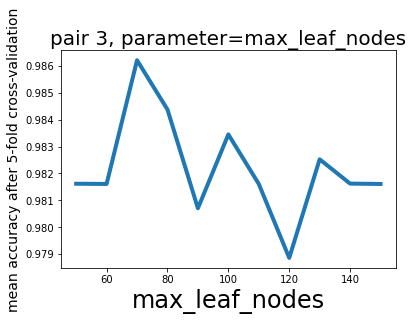

In [185]:
plt.plot(y3, l, linewidth=4)
plt.title("pair 3, parameter=max_leaf_nodes", fontsize=20)
plt.xlabel("max_leaf_nodes", fontsize=24)
plt.ylabel("mean accuracy after 5-fold cross-validation", fontsize=14)
# plt.tick_params(axis='both',
# labelsize=10)
plt.show()

## 3. random forest

In [234]:
rf = ensemble.RandomForestClassifier(criterion='gini', max_depth=25, min_samples_split=4, 
                                     max_leaf_nodes=145, min_samples_leaf=1, n_estimators=10, bootstrap=True)
print('random forest results')
print(' ')
# for pair 1
print('Accuracy of Pair 1 using 5-fold cross-validation:')
print(cross_val_score(rf, xHKtrain, yHKtrain, cv=5, scoring='accuracy'))
print('mean is: ', mean(cross_val_score(rf, xHKtrain, yHKtrain, cv=5, scoring='accuracy')))
print('===================================================')

# for pair 2
print('Accuracy of Pair 2 using 5-fold cross-validation:')
print(cross_val_score(rf, xMYtrain, yMYtrain, cv=5, scoring='accuracy'))
print('mean is: ', mean(cross_val_score(rf, xMYtrain, yMYtrain, cv=5, scoring='accuracy')))
print('===================================================')

# for pair 3
print('Accuracy of Pair 3 using 5-fold cross-validation:')
print(cross_val_score(rf, xABtrain, yABtrain, cv=5, scoring='accuracy'))
print('mean is: ', mean(cross_val_score(rf, xABtrain, yABtrain, cv=5, scoring='accuracy')))

random forest results
 
Accuracy of Pair 1 using 5-fold cross-validation:
[0.95652174 0.95145631 0.96601942 0.9223301  0.94660194]
mean is:  0.9524600159467193
Accuracy of Pair 2 using 5-fold cross-validation:
[1.         1.         1.         0.99547511 0.98181818]
mean is:  0.9945619086795559
Accuracy of Pair 3 using 5-fold cross-validation:
[1. 1. 1. 1. 1.]
mean is:  0.9972434786285038


In [235]:
#validation
print('hk ',mean(cross_val_score(rf, xHKvalidation, yHKvalidation, cv=5, scoring='accuracy')))
print('my ',mean(cross_val_score(rf, xMYvalidation, yMYvalidation, cv=5, scoring='accuracy')))
print('ab ',mean(cross_val_score(rf, xABvalidation, yABvalidation, cv=5, scoring='accuracy')))

hk  0.8510344827586207
my  0.98125
ab  1.0


In [186]:
a, b, c = [], [], []
y = [m for m in range(1,31)]
for i in range(1, 31):
    rf = ensemble.RandomForestClassifier(max_depth=i)
    a.append(mean(cross_val_score(rf, xHKtrain, yHKtrain, cv=5, scoring='accuracy')))
    b.append(mean(cross_val_score(rf, xMYtrain, yMYtrain, cv=5, scoring='accuracy')))
    c.append(mean(cross_val_score(rf, xABtrain, yABtrain, cv=5, scoring='accuracy')))

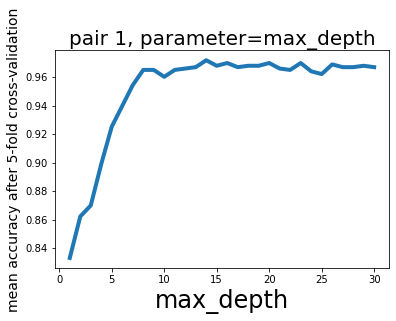

In [190]:
plt.plot(y, a, linewidth=4)
plt.title("pair 1, parameter=max_depth", fontsize=20)
plt.xlabel("max_depth", fontsize=24)
plt.ylabel("mean accuracy after 5-fold cross-validation", fontsize=14)
# plt.tick_params(axis='both',
# labelsize=10)
plt.show()

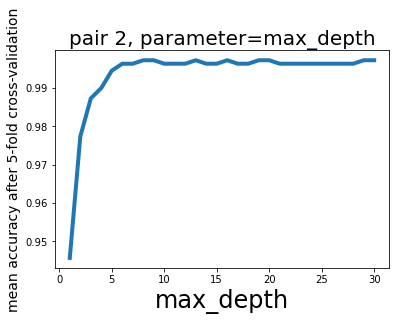

In [191]:
plt.plot(y, b, linewidth=4)
plt.title("pair 2, parameter=max_depth", fontsize=20)
plt.xlabel("max_depth", fontsize=24)
plt.ylabel("mean accuracy after 5-fold cross-validation", fontsize=14)
# plt.tick_params(axis='both',
# labelsize=10)
plt.show()

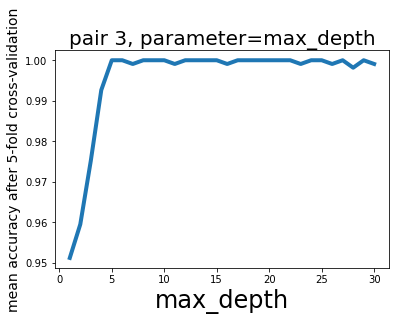

In [192]:
plt.plot(y, c, linewidth=4)
plt.title("pair 3, parameter=max_depth", fontsize=20)
plt.xlabel("max_depth", fontsize=24)
plt.ylabel("mean accuracy after 5-fold cross-validation", fontsize=14)
# plt.tick_params(axis='both',
# labelsize=10)
plt.show()

## 4. svm

In [257]:
from sklearn import svm
svm = svm.SVC(kernel='poly', C=1.4, degree=3, coef0=5, decision_function_shape='ovo')
print('svm results')
print(' ')
# for pair 1
print('Accuracy of Pair 1 using 5-fold cross-validation:')
print(cross_val_score(svm, xHKtrain, yHKtrain, cv=5, scoring='accuracy'))
print('mean is: ', mean(cross_val_score(svm, xHKtrain, yHKtrain, cv=5, scoring='accuracy')))
print('===================================================')

# for pair 2
print('Accuracy of Pair 2 using 5-fold cross-validation:')
print(cross_val_score(svm, xMYtrain, yMYtrain, cv=5, scoring='accuracy'))
print('mean is: ', mean(cross_val_score(svm, xMYtrain, yMYtrain, cv=5, scoring='accuracy')))
print('===================================================')

# for pair 3
print('Accuracy of Pair 3 using 5-fold cross-validation:')
print(cross_val_score(svm, xABtrain, yABtrain, cv=5, scoring='accuracy'))
print('mean is: ', mean(cross_val_score(svm, xABtrain, yABtrain, cv=5, scoring='accuracy')))

svm results
 
Accuracy of Pair 1 using 5-fold cross-validation:
[0.99033816 0.97572816 0.97572816 0.97087379 0.96601942]
mean is:  0.9757375357628628
Accuracy of Pair 2 using 5-fold cross-validation:
[1.         1.         1.         1.         0.99545455]
mean is:  0.999090909090909
Accuracy of Pair 3 using 5-fold cross-validation:
[0.99541284 0.99541284 1.         1.         0.99539171]
mean is:  0.9972434786285038


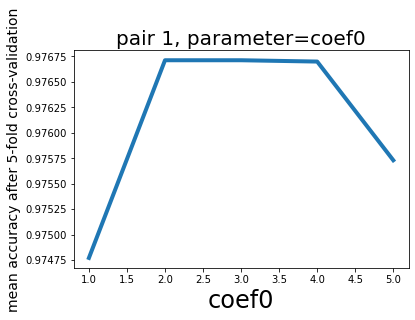

In [258]:
y = [1,2,3,4,5]
a = [0.97477,0.976713,0.976713,0.9767,0.97573]
plt.plot(y, a, linewidth=4)
plt.title("pair 1, parameter=coef0", fontsize=20)
plt.xlabel("coef0", fontsize=24)
plt.ylabel("mean accuracy after 5-fold cross-validation", fontsize=14)
# plt.tick_params(axis='both',
# labelsize=10)
plt.show()

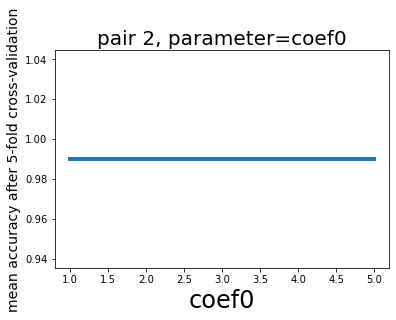

In [261]:
y = [1,2,3,4,5]
b = [0.99,0.99,0.99,0.99,0.99]
plt.plot(y, b, linewidth=4)
plt.title("pair 2, parameter=coef0", fontsize=20)
plt.xlabel("coef0", fontsize=24)
plt.ylabel("mean accuracy after 5-fold cross-validation", fontsize=14)
# plt.tick_params(axis='both',
# labelsize=10)
plt.show()

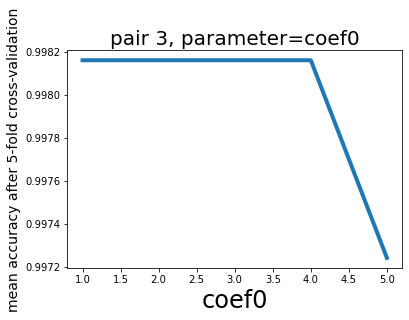

In [262]:
y = [1,2,3,4,5]
c = [0.99816,0.99816,0.99816,0.99816,0.99724]
plt.plot(y, c, linewidth=4)
plt.title("pair 3, parameter=coef0", fontsize=20)
plt.xlabel("coef0", fontsize=24)
plt.ylabel("mean accuracy after 5-fold cross-validation", fontsize=14)
# plt.tick_params(axis='both',
# labelsize=10)
plt.show()

In [237]:
#validation
print('hk ',mean(cross_val_score(svm, xHKvalidation, yHKvalidation, cv=5, scoring='accuracy')))
print('my ',mean(cross_val_score(svm, xMYvalidation, yMYvalidation, cv=5, scoring='accuracy')))
print('ab ',mean(cross_val_score(svm, xABvalidation, yABvalidation, cv=5, scoring='accuracy')))

hk  0.8917241379310346
my  0.98125
ab  0.955241935483871


## 5. artificial neural network

In [239]:
ann = MLPClassifier(solver='lbfgs', activation='tanh', max_iter=1000, alpha=1e-5, hidden_layer_sizes = (100,50))
print('artificial neural network results')
print(' ')
# for pair 1
print('Accuracy of Pair 1 using 5-fold cross-validation:')
print(cross_val_score(ann, xHKtrain, yHKtrain, cv=5, scoring='accuracy'))
print('mean is: ', mean(cross_val_score(ann, xHKtrain, yHKtrain, cv=5, scoring='accuracy')))
print('===================================================')

# for pair 2
print('Accuracy of Pair 2 using 5-fold cross-validation:')
print(cross_val_score(ann, xMYtrain, yMYtrain, cv=5, scoring='accuracy'))
print('mean is: ', mean(cross_val_score(ann, xMYtrain, yMYtrain, cv=5, scoring='accuracy')))
print('===================================================')

# for pair 3
print('Accuracy of Pair 3 using 5-fold cross-validation:')
print(cross_val_score(ann, xABtrain, yABtrain, cv=5, scoring='accuracy'))
print('mean is: ', mean(cross_val_score(ann, xABtrain, yABtrain, cv=5, scoring='accuracy')))

artificial neural network results
 
Accuracy of Pair 1 using 5-fold cross-validation:
[0.98067633 0.96601942 0.97087379 0.97087379 0.9223301 ]
mean is:  0.9582899488766943
Accuracy of Pair 2 using 5-fold cross-validation:
[1.         1.         1.         0.99547511 0.99545455]
mean is:  0.999090909090909
Accuracy of Pair 3 using 5-fold cross-validation:
[0.99541284 0.99082569 1.         1.         0.99539171]
mean is:  0.9963218196423288


In [240]:
#validation
print('hk ',mean(cross_val_score(ann, xHKvalidation, yHKvalidation, cv=5, scoring='accuracy')))
print('my ',mean(cross_val_score(ann, xMYvalidation, yMYvalidation, cv=5, scoring='accuracy')))
print('ab ',mean(cross_val_score(ann, xABvalidation, yABvalidation, cv=5, scoring='accuracy')))

hk  0.8917241379310343
my  0.9875
ab  0.9679435483870968


In [209]:
a, b, c = [], [], []
y = [m for m in (['identity', 'logistic', 'tanh', 'relu'])]
for i in (['identity', 'logistic', 'tanh', 'relu']):
    ann = MLPClassifier(activation=i)
    a.append(mean(cross_val_score(ann, xHKtrain, yHKtrain, cv=5, scoring='accuracy')))
    b.append(mean(cross_val_score(ann, xMYtrain, yMYtrain, cv=5, scoring='accuracy')))
    c.append(mean(cross_val_score(ann, xABtrain, yABtrain, cv=5, scoring='accuracy')))

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multi

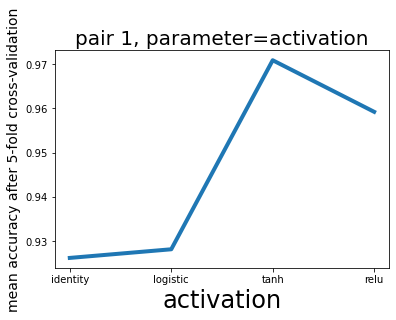

In [210]:
plt.plot(y, a, linewidth=4)
plt.title("pair 1, parameter=activation", fontsize=20)
plt.xlabel("activation", fontsize=24)
plt.ylabel("mean accuracy after 5-fold cross-validation", fontsize=14)
# plt.tick_params(axis='both',
# labelsize=10)
plt.show()

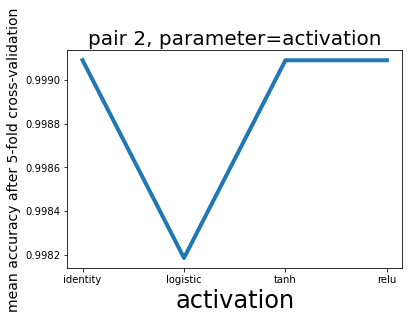

In [211]:
plt.plot(y, b, linewidth=4)
plt.title("pair 2, parameter=activation", fontsize=20)
plt.xlabel("activation", fontsize=24)
plt.ylabel("mean accuracy after 5-fold cross-validation", fontsize=14)
# plt.tick_params(axis='both',
# labelsize=10)
plt.show()

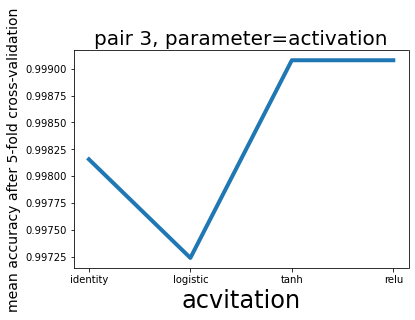

In [212]:
plt.plot(y, c, linewidth=4)
plt.title("pair 3, parameter=activation", fontsize=20)
plt.xlabel("acvitation", fontsize=24)
plt.ylabel("mean accuracy after 5-fold cross-validation", fontsize=14)
# plt.tick_params(axis='both',
# labelsize=10)
plt.show()

# C) Dimension reduction

## 1)filter method--f_score

In [28]:
# for pair 1
f_scoreHK = chi2(xHKtrain, yHKtrain)
f_scoreHK

(array([  2.34790343,   5.83127938,   1.64230957,   1.32540654,
          4.72526549, 124.39324733,   1.69915383, 389.38363223,
         62.77689155,   0.64276246,   4.35880876, 124.68824024,
          2.71264931,   3.57138446,  69.33747295,  26.07211897]),
 array([1.25451630e-01, 1.57436698e-02, 2.00008881e-01, 2.49624046e-01,
        2.97225945e-02, 6.90983119e-29, 1.92398674e-01, 1.12735719e-86,
        2.31499101e-15, 4.22712238e-01, 3.68180426e-02, 5.95530684e-29,
        9.95555307e-02, 5.87832829e-02, 8.29779794e-17, 3.28899244e-07]))

In [29]:
p_valuesHK = pd.Series(f_scoreHK[1], index = xHKtrain.columns)
p_valuesHK.sort_values(ascending = True, inplace = True)
p_valuesHK

x2bar    1.127357e-86
xy2br    5.955307e-29
x-bar    6.909831e-29
y-ege    8.297798e-17
y2bar    2.314991e-15
yegvx    3.288992e-07
y-box    1.574367e-02
onpix    2.972259e-02
x2ybr    3.681804e-02
xegvy    5.878328e-02
x-ege    9.955553e-02
x-box    1.254516e-01
y-bar    1.923987e-01
width    2.000089e-01
high     2.496240e-01
xybar    4.227122e-01
dtype: float64

In [33]:
# for pair 2
f_scoreMY = chi2(xMYtrain, yMYtrain)
f_scoreMY

(array([2.45328880e+01, 1.31680523e+00, 7.91135333e+01, 1.34840081e+01,
        2.94699830e+02, 5.64731894e+01, 3.32900141e+02, 7.79555437e+02,
        1.39590109e+02, 4.14611990e+00, 4.43211697e+02, 3.71425581e+01,
        1.88498054e+03, 6.81835377e+02, 6.68798987e+01, 5.50580127e+01]),
 array([7.30522287e-007, 2.51166219e-001, 5.86412504e-019, 2.40605299e-004,
        4.70471962e-066, 5.69698818e-014, 2.24461099e-074, 1.50365782e-171,
        3.27226322e-032, 4.17300430e-002, 2.16502521e-098, 1.09800988e-009,
        0.00000000e+000, 2.66559880e-150, 2.88562339e-016, 1.17024273e-013]))

In [34]:
p_valuesMY = pd.Series(f_scoreMY[1], index = xMYtrain.columns)
p_valuesMY.sort_values(ascending = True, inplace = True)
p_valuesMY

x-ege     0.000000e+00
x2bar    1.503658e-171
xegvy    2.665599e-150
x2ybr     2.165025e-98
y-bar     2.244611e-74
onpix     4.704720e-66
y2bar     3.272263e-32
width     5.864125e-19
y-ege     2.885623e-16
x-bar     5.696988e-14
yegvx     1.170243e-13
xy2br     1.098010e-09
x-box     7.305223e-07
high      2.406053e-04
xybar     4.173004e-02
y-box     2.511662e-01
dtype: float64

In [36]:
# for pair 3
f_scoreAB = chi2(xABtrain, yABtrain)
f_scoreAB

(array([4.24392982e+01, 2.89526939e+00, 2.42537912e-01, 1.04311114e+00,
        2.15242963e+02, 4.26201415e+01, 6.09321514e+02, 4.80817898e+02,
        8.97466210e+02, 7.67878627e-01, 6.91872424e+02, 1.14926684e+02,
        1.67947633e+01, 1.01123547e+02, 8.31943116e+02, 8.78155967e+01]),
 array([7.29102618e-011, 8.88399233e-002, 6.22379080e-001, 3.07099006e-001,
        9.86427470e-049, 6.64713858e-011, 1.57152485e-134, 1.41831015e-106,
        3.48848728e-197, 3.80874117e-001, 1.75030502e-152, 8.16614650e-027,
        4.16480755e-005, 8.64214251e-024, 6.12661321e-183, 7.18501431e-021]))

In [37]:
p_valuesAB = pd.Series(f_scoreAB[1], index = xABtrain.columns)
p_valuesAB.sort_values(ascending = True, inplace = True)
p_valuesAB

y2bar    3.488487e-197
y-ege    6.126613e-183
x2ybr    1.750305e-152
y-bar    1.571525e-134
x2bar    1.418310e-106
onpix     9.864275e-49
xy2br     8.166146e-27
xegvy     8.642143e-24
yegvx     7.185014e-21
x-bar     6.647139e-11
x-box     7.291026e-11
x-ege     4.164808e-05
y-box     8.883992e-02
high      3.070990e-01
xybar     3.808741e-01
width     6.223791e-01
dtype: float64

In [114]:
# new x and y for pair 1
xnew1HKtrain = dataHK.loc[0:1031, ['x2bar','xy2br','x-bar','y-ege']]
xnew1HKtest = dataHK.loc[1031:1325, ['x2bar','xy2br','x-bar','y-ege']]
xnew1HKvalidation = dataHK.loc[1325:, ['x2bar','xy2br','x-bar','y-ege']]
ynew1HKtrain = dataHK.loc[0:1031, 'lettr']
ynew1HKtest = dataHK.loc[1031:1325, 'lettr']
ynew1HKvalidation = dataHK.loc[1325:, 'lettr']

# new x and y for pair 2
xnew1MYtrain = dataMY.loc[0:1104, ['x-ege','x2bar','xegvy','x2ybr']]
xnew1MYtest = dataMY.loc[1104:1420, ['x-ege','x2bar','xegvy','x2ybr']]
xnew1MYvalidation = dataMY.loc[1420:, ['x-ege','x2bar','xegvy','x2ybr']]
ynew1MYtrain = dataMY.loc[0:1104, 'lettr']
ynew1MYtest = dataMY.loc[1104:1420, 'lettr']
ynew1MYvalidation = dataMY.loc[1420:, 'lettr']

# new x and y for pair 3
xnew1ABtrain = dataAB.loc[0:1088, ['y2bar','y-ege','x2ybr','y-bar']]
xnew1ABtest = dataAB.loc[1088:1399, ['y2bar','y-ege','x2ybr','y-bar']]
xnew1ABvalidation = dataAB.loc[1399:, ['y2bar','y-ege','x2ybr','y-bar']]
ynew1ABtrain = dataAB.loc[0:1088, 'lettr']
ynew1ABtest = dataAB.loc[1088:1399, 'lettr']
ynew1ABvalidation = dataAB.loc[1399:, 'lettr']

### 1. k-nearest neighbors

In [241]:
knn = neighbors.KNeighborsClassifier(n_neighbors=7, weights='distance',algorithm='auto', leaf_size=50, p=2)
print('k-nearest neighbors results after filter method')
print(' ')
# for pair 1
print('Accuracy of Pair 1 using 5-fold cross-validation:')
print(cross_val_score(knn, xnew1HKtrain, ynew1HKtrain, cv=5, scoring='accuracy'))
print('mean is: ', mean(cross_val_score(knn, xnew1HKtrain, ynew1HKtrain, cv=5, scoring='accuracy')))
print('===================================================')

# for pair 2
print('Accuracy of Pair 2 using 5-fold cross-validation:')
print(cross_val_score(knn, xnew1MYtrain, ynew1MYtrain, cv=5, scoring='accuracy'))
print('mean is: ', mean(cross_val_score(knn, xnew1MYtrain, ynew1MYtrain, cv=5, scoring='accuracy')))
print('===================================================')

# for pair 3
print('Accuracy of Pair 3 using 5-fold cross-validation:')
print(cross_val_score(knn, xnew1ABtrain, ynew1ABtrain, cv=5, scoring='accuracy'))
print('mean is: ', mean(cross_val_score(knn, xnew1ABtrain, ynew1ABtrain, cv=5, scoring='accuracy')))

k-nearest neighbors results after filter method
 
Accuracy of Pair 1 using 5-fold cross-validation:
[0.89371981 0.88888889 0.90776699 0.89805825 0.88349515]
mean is:  0.8943858168003377
Accuracy of Pair 2 using 5-fold cross-validation:
[0.99095023 0.98190045 0.99547511 0.99547511 0.99095023]
mean is:  0.9909502262443439
Accuracy of Pair 3 using 5-fold cross-validation:
[0.99082569 0.97247706 0.98165138 0.97706422 0.95852535]
mean is:  0.9761087388491948


In [242]:
#validation
print('hk ',mean(cross_val_score(knn, xnew1HKvalidation, yHKvalidation, cv=5, scoring='accuracy')))
print('my ',mean(cross_val_score(knn, xnew1MYvalidation, yMYvalidation, cv=5, scoring='accuracy')))
print('ab ',mean(cross_val_score(knn, xnew1ABvalidation, yABvalidation, cv=5, scoring='accuracy')))

hk  0.8581609195402299
my  0.99375
ab  0.9423387096774194


In [215]:
a, b, c = [], [], []
y = [m for m in range(1,31)]
for i in range(1,31):
    knn = neighbors.KNeighborsClassifier(n_neighbors=i)
    a.append(mean(cross_val_score(knn, xnew1HKtrain, ynew1HKtrain, cv=5, scoring='accuracy')))
    b.append(mean(cross_val_score(knn, xnew1MYtrain, ynew1MYtrain, cv=5, scoring='accuracy')))
    c.append(mean(cross_val_score(knn, xnew1ABtrain, ynew1ABtrain, cv=5, scoring='accuracy')))

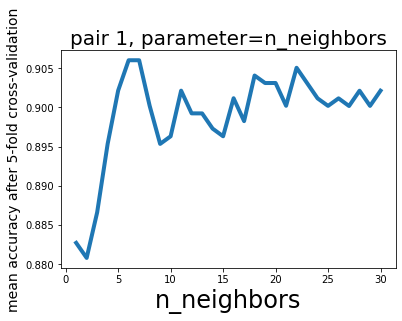

In [216]:
plt.plot(y, a, linewidth=4)
plt.title("pair 1, parameter=n_neighbors", fontsize=20)
plt.xlabel("n_neighbors", fontsize=24)
plt.ylabel("mean accuracy after 5-fold cross-validation", fontsize=14)
# plt.tick_params(axis='both',
# labelsize=10)
plt.show()

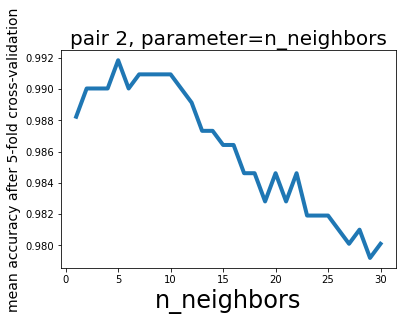

In [217]:
plt.plot(y, b, linewidth=4)
plt.title("pair 2, parameter=n_neighbors", fontsize=20)
plt.xlabel("n_neighbors", fontsize=24)
plt.ylabel("mean accuracy after 5-fold cross-validation", fontsize=14)
# plt.tick_params(axis='both',
# labelsize=10)
plt.show()

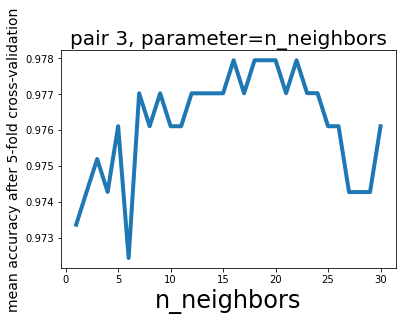

In [218]:
plt.plot(y, c, linewidth=4)
plt.title("pair 3, parameter=n_neighbors", fontsize=20)
plt.xlabel("n_neighbors", fontsize=24)
plt.ylabel("mean accuracy after 5-fold cross-validation", fontsize=14)
# plt.tick_params(axis='both',
# labelsize=10)
plt.show()

### 2. decision tree

In [243]:
dt = tree.DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=22, min_samples_split=4, 
                                 min_samples_leaf=1, max_leaf_nodes=145)
print('decision tree results after filter method')
print(' ')
# for pair 1
print('Accuracy of Pair 1 using 5-fold cross-validation:')
print(cross_val_score(dt, xnew1HKtrain, ynew1HKtrain, cv=5, scoring='accuracy'))
print('mean is: ', mean(cross_val_score(dt, xnew1HKtrain, ynew1HKtrain, cv=5, scoring='accuracy')))
print('===================================================')

# for pair 2
print('Accuracy of Pair 2 using 5-fold cross-validation:')
print(cross_val_score(dt, xnew1MYtrain, ynew1MYtrain, cv=5, scoring='accuracy'))
print('mean is: ', mean(cross_val_score(dt, xnew1MYtrain, ynew1MYtrain, cv=5, scoring='accuracy')))
print('===================================================')

# for pair 3
print('Accuracy of Pair 3 using 5-fold cross-validation:')
print(cross_val_score(dt, xnew1ABtrain, ynew1ABtrain, cv=5, scoring='accuracy'))
print('mean is: ', mean(cross_val_score(dt, xnew1ABtrain, ynew1ABtrain, cv=5, scoring='accuracy')))

decision tree results after filter method
 
Accuracy of Pair 1 using 5-fold cross-validation:
[0.88405797 0.89371981 0.90291262 0.88834951 0.86407767]
mean is:  0.8827494019980302
Accuracy of Pair 2 using 5-fold cross-validation:
[0.98642534 0.99095023 0.99547511 0.99095023 0.97737557]
mean is:  0.9882352941176471
Accuracy of Pair 3 using 5-fold cross-validation:
[0.99082569 0.97247706 0.96788991 0.96788991 0.97235023]
mean is:  0.9742865598444173


In [244]:
#validation
print('hk ',mean(cross_val_score(dt, xnew1HKvalidation, yHKvalidation, cv=5, scoring='accuracy')))
print('my ',mean(cross_val_score(dt, xnew1MYvalidation, yMYvalidation, cv=5, scoring='accuracy')))
print('ab ',mean(cross_val_score(dt, xnew1ABvalidation, yABvalidation, cv=5, scoring='accuracy')))

hk  0.8301149425287356
my  0.975
ab  0.955241935483871


In [219]:
a, b, c = [], [], []
y = [m for m in range(1,31)]
for i in range(1,31):
    dt = tree.DecisionTreeClassifier(max_depth=i)
    a.append(mean(cross_val_score(dt, xnew1HKtrain, ynew1HKtrain, cv=5, scoring='accuracy')))
    b.append(mean(cross_val_score(dt, xnew1MYtrain, ynew1MYtrain, cv=5, scoring='accuracy')))
    c.append(mean(cross_val_score(dt, xnew1ABtrain, ynew1ABtrain, cv=5, scoring='accuracy')))

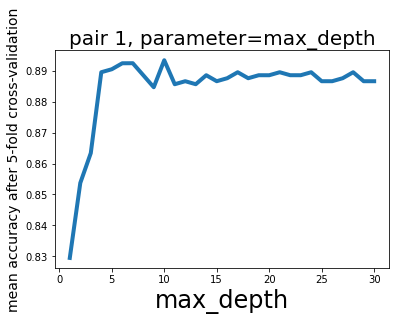

In [220]:
plt.plot(y, a, linewidth=4)
plt.title("pair 1, parameter=max_depth", fontsize=20)
plt.xlabel("max_depth", fontsize=24)
plt.ylabel("mean accuracy after 5-fold cross-validation", fontsize=14)
# plt.tick_params(axis='both',
# labelsize=10)
plt.show()

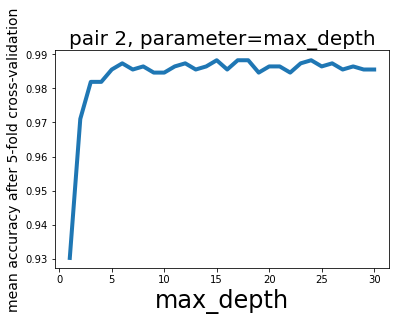

In [222]:
plt.plot(y, b, linewidth=4)
plt.title("pair 2, parameter=max_depth", fontsize=20)
plt.xlabel("max_depth", fontsize=24)
plt.ylabel("mean accuracy after 5-fold cross-validation", fontsize=14)
# plt.tick_params(axis='both',
# labelsize=10)
plt.show()

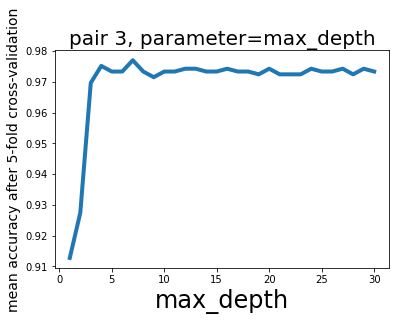

In [223]:
plt.plot(y, c, linewidth=4)
plt.title("pair 3, parameter=max_depth", fontsize=20)
plt.xlabel("max_depth", fontsize=24)
plt.ylabel("mean accuracy after 5-fold cross-validation", fontsize=14)
# plt.tick_params(axis='both',
# labelsize=10)
plt.show()

### 3. random forest

In [245]:
rf = ensemble.RandomForestClassifier(criterion='gini', max_depth=25, min_samples_split=4, 
                                     max_leaf_nodes=145, min_samples_leaf=1, n_estimators=10, bootstrap=True)
print('random forest results after filter method')
print(' ')
# for pair 1
print('Accuracy of Pair 1 using 5-fold cross-validation:')
print(cross_val_score(rf, xnew1HKtrain, ynew1HKtrain, cv=5, scoring='accuracy'))
print('mean is: ', mean(cross_val_score(rf, xnew1HKtrain, ynew1HKtrain, cv=5, scoring='accuracy')))
print('===================================================')

# for pair 2
print('Accuracy of Pair 2 using 5-fold cross-validation:')
print(cross_val_score(rf, xnew1MYtrain, ynew1MYtrain, cv=5, scoring='accuracy'))
print('mean is: ', mean(cross_val_score(rf, xnew1MYtrain, ynew1MYtrain, cv=5, scoring='accuracy')))
print('===================================================')

# for pair 3
print('Accuracy of Pair 3 using 5-fold cross-validation:')
print(cross_val_score(rf, xnew1ABtrain, ynew1ABtrain, cv=5, scoring='accuracy'))
print('mean is: ', mean(cross_val_score(rf, xnew1ABtrain, ynew1ABtrain, cv=5, scoring='accuracy')))

random forest results after filter method
 
Accuracy of Pair 1 using 5-fold cross-validation:
[0.9178744  0.90338164 0.89805825 0.90776699 0.91747573]
mean is:  0.9069649641198818
Accuracy of Pair 2 using 5-fold cross-validation:
[0.99095023 0.98190045 1.         0.98642534 0.97285068]
mean is:  0.9900452488687783
Accuracy of Pair 3 using 5-fold cross-validation:
[0.99541284 0.95412844 0.96788991 0.96330275 0.95852535]
mean is:  0.9751997632435632


In [246]:
#validation
print('hk ',mean(cross_val_score(rf, xnew1HKvalidation, yHKvalidation, cv=5, scoring='accuracy')))
print('my ',mean(cross_val_score(rf, xnew1MYvalidation, yMYvalidation, cv=5, scoring='accuracy')))
print('ab ',mean(cross_val_score(rf, xnew1ABvalidation, yABvalidation, cv=5, scoring='accuracy')))

hk  0.871264367816092
my  0.98125
ab  0.9487903225806452


In [224]:
a, b, c = [], [], []
y = [m for m in range(1,31)]
for i in range(1,31):
    rf = ensemble.RandomForestClassifier(max_depth=i)
    a.append(mean(cross_val_score(rf, xnew1HKtrain, ynew1HKtrain, cv=5, scoring='accuracy')))
    b.append(mean(cross_val_score(rf, xnew1MYtrain, ynew1MYtrain, cv=5, scoring='accuracy')))
    c.append(mean(cross_val_score(rf, xnew1ABtrain, ynew1ABtrain, cv=5, scoring='accuracy')))

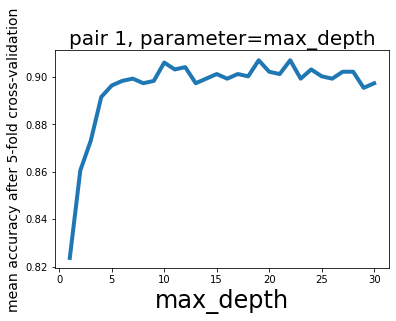

In [225]:
plt.plot(y, a, linewidth=4)
plt.title("pair 1, parameter=max_depth", fontsize=20)
plt.xlabel("max_depth", fontsize=24)
plt.ylabel("mean accuracy after 5-fold cross-validation", fontsize=14)
# plt.tick_params(axis='both',
# labelsize=10)
plt.show()

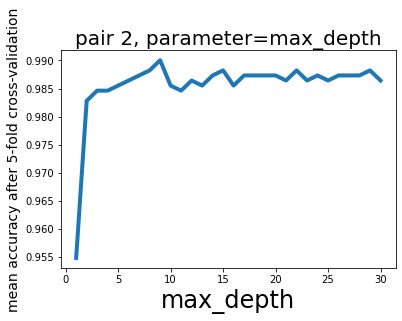

In [226]:
plt.plot(y, b, linewidth=4)
plt.title("pair 2, parameter=max_depth", fontsize=20)
plt.xlabel("max_depth", fontsize=24)
plt.ylabel("mean accuracy after 5-fold cross-validation", fontsize=14)
# plt.tick_params(axis='both',
# labelsize=10)
plt.show()

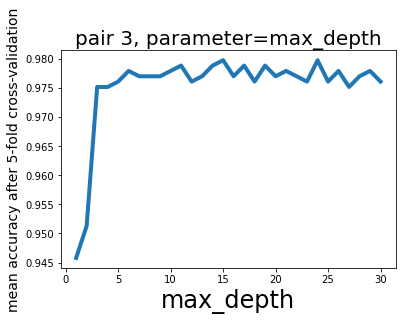

In [227]:
plt.plot(y, c, linewidth=4)
plt.title("pair 3, parameter=max_depth", fontsize=20)
plt.xlabel("max_depth", fontsize=24)
plt.ylabel("mean accuracy after 5-fold cross-validation", fontsize=14)
# plt.tick_params(axis='both',
# labelsize=10)
plt.show()

### 4. svm

In [247]:
from sklearn import svm
svm = svm.SVC(kernel='poly', C=1.4, degree=3, coef0=5, decision_function_shape='ovo')
print('svm results after filter method')
print(' ')
# for pair 1
print('Accuracy of Pair 1 using 5-fold cross-validation:')
print(cross_val_score(svm, xnew1HKtrain, ynew1HKtrain, cv=5, scoring='accuracy'))
print('mean is: ', mean(cross_val_score(svm, xnew1HKtrain, ynew1HKtrain, cv=5, scoring='accuracy')))
print('===================================================')

# for pair 2
print('Accuracy of Pair 2 using 5-fold cross-validation:')
print(cross_val_score(svm, xnew1MYtrain, ynew1MYtrain, cv=5, scoring='accuracy'))
print('mean is: ', mean(cross_val_score(svm, xnew1MYtrain, ynew1MYtrain, cv=5, scoring='accuracy')))
print('===================================================')

# for pair 3
print('Accuracy of Pair 3 using 5-fold cross-validation:')
print(cross_val_score(svm, xnew1ABtrain, ynew1ABtrain, cv=5, scoring='accuracy'))
print('mean is: ', mean(cross_val_score(svm, xnew1ABtrain, ynew1ABtrain, cv=5, scoring='accuracy')))

svm results after filter method
 
Accuracy of Pair 1 using 5-fold cross-validation:
[0.91304348 0.90338164 0.9368932  0.90291262 0.89320388]
mean is:  0.9098869659021623
Accuracy of Pair 2 using 5-fold cross-validation:
[0.99095023 0.98642534 0.99547511 0.99095023 0.98190045]
mean is:  0.9891402714932127
Accuracy of Pair 3 using 5-fold cross-validation:
[1.         0.96788991 0.97706422 0.98623853 0.95852535]
mean is:  0.9779436012345156


In [248]:
#validation
print('hk ',mean(cross_val_score(svm, xnew1HKvalidation, yHKvalidation, cv=5, scoring='accuracy')))
print('my ',mean(cross_val_score(svm, xnew1MYvalidation, yMYvalidation, cv=5, scoring='accuracy')))
print('ab ',mean(cross_val_score(svm,xnew1ABvalidation, yABvalidation, cv=5, scoring='accuracy')))

hk  0.864367816091954
my  0.98125
ab  0.9233870967741936


### 5. artificial neural network

In [121]:
ann = MLPClassifier(solver='lbfgs', activation='tanh', alpha=1e-5, hidden_layer_sizes = (100,50))
print('artificial neural network results after filter method')
print(' ')
# for pair 1
print('Accuracy of Pair 1 using 5-fold cross-validation:')
print(cross_val_score(ann, xnew1HKtrain, ynew1HKtrain, cv=5, scoring='accuracy'))
print('mean is: ', mean(cross_val_score(ann, xnew1HKtrain, ynew1HKtrain, cv=5, scoring='accuracy')))
print('===================================================')

# for pair 2
print('Accuracy of Pair 2 using 5-fold cross-validation:')
print(cross_val_score(ann, xnew1MYtrain, ynew1MYtrain, cv=5, scoring='accuracy'))
print('mean is: ', mean(cross_val_score(ann, xnew1MYtrain, ynew1MYtrain, cv=5, scoring='accuracy')))
print('===================================================')

# for pair 3
print('Accuracy of Pair 3 using 5-fold cross-validation:')
print(cross_val_score(ann, xnew1ABtrain, ynew1ABtrain, cv=5, scoring='accuracy'))
print('mean is: ', mean(cross_val_score(ann, xnew1ABtrain, ynew1ABtrain, cv=5, scoring='accuracy')))

artificial neural network results after filter method
 
Accuracy of Pair 1 using 5-fold cross-validation:


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

[0.88405797 0.88888889 0.91747573 0.86893204 0.87378641]


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

mean is:  0.8856526429341963
Accuracy of Pair 2 using 5-fold cross-validation:


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[0.97285068 0.98642534 0.97737557 0.99095023 0.98642534]


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


mean is:  0.980995475113122
Accuracy of Pair 3 using 5-fold cross-validation:


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

[0.99082569 0.9587156  0.95412844 0.97247706 0.94930876]


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

mean is:  0.9687566059273666


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [249]:
#validation
print('hk ',mean(cross_val_score(ann, xnew1HKvalidation, yHKvalidation, cv=5, scoring='accuracy')))
print('my ',mean(cross_val_score(ann, xnew1MYvalidation, yMYvalidation, cv=5, scoring='accuracy')))
print('ab ',mean(cross_val_score(ann,xnew1ABvalidation, yABvalidation, cv=5, scoring='accuracy')))

hk  0.83816091954023
my  0.9872983870967742
ab  0.9233870967741936


## 2)Wrapper Feature Selection--forward feature selection

In [79]:
svm_clf = svm.SVC()

In [80]:
# for pair 1
sfs = SFS(estimator=svm_clf,k_features=4,forward=True, scoring='accuracy',cv=5)
sfs.fit(xHKtrain,yHKtrain)
sfs.k_feature_names_

('x2bar', 'y2bar', 'xybar', 'xy2br')

In [81]:
# for pair 2
sfs = SFS(estimator=svm_clf,k_features=4,forward=True, scoring='accuracy',cv=5)
sfs.fit(xMYtrain,yMYtrain)
sfs.k_feature_names_

('x-bar', 'x2ybr', 'x-ege', 'y-ege')

In [82]:
# for pair 3
sfs = SFS(estimator=svm_clf,k_features=4,forward=True, scoring='accuracy',cv=5)
sfs.fit(xABtrain,yABtrain)
sfs.k_feature_names_

('x2ybr', 'xy2br', 'y-ege', 'yegvx')

In [123]:
# new x and y for pair 1
xnew2HKtrain = dataHK.loc[0:1031, ['x2bar', 'y2bar', 'xybar', 'xy2br']]
xnew2HKtest = dataHK.loc[1031:1325, ['x2bar', 'y2bar', 'xybar', 'xy2br']]
xnew2HKvalidation = dataHK.loc[1325:, ['x2bar', 'y2bar', 'xybar', 'xy2br']]
ynew2HKtrain = dataHK.loc[0:1031, 'lettr']
ynew2HKtest = dataHK.loc[1031:1325, 'lettr']
ynew2HKvalidation = dataHK.loc[1325:, 'lettr']

# new x and y for pair 2
xnew2MYtrain = dataMY.loc[0:1104, ['x-bar', 'x2ybr', 'x-ege', 'y-ege']]
xnew2MYtest = dataMY.loc[1104:1420, ['x-bar', 'x2ybr', 'x-ege', 'y-ege']]
xnew2MYvalidation = dataMY.loc[1420:, ['x-bar', 'x2ybr', 'x-ege', 'y-ege']]
ynew2MYtrain = dataMY.loc[0:1104, 'lettr']
ynew2MYtest = dataMY.loc[1104:1420, 'lettr']
ynew2MYvalidation = dataMY.loc[1420:, 'lettr']

# new x and y for pair 3
xnew2ABtrain = dataAB.loc[0:1088, ['x2ybr', 'xy2br', 'y-ege', 'yegvx']]
xnew2ABtest = dataAB.loc[1088:1399, ['x2ybr', 'xy2br', 'y-ege', 'yegvx']]
xnew2ABvalidation = dataAB.loc[1399:, ['x2ybr', 'xy2br', 'y-ege', 'yegvx']]
ynew2ABtrain = dataAB.loc[0:1088, 'lettr']
ynew2ABtest = dataAB.loc[1088:1399, 'lettr']
ynew2ABvalidation = dataAB.loc[1399:, 'lettr']

### 1. k-nearest neighbors

In [124]:
knn = neighbors.KNeighborsClassifier(n_neighbors=7, weights='distance',algorithm='auto', leaf_size=50, p=2)
print('k-nearest neighbors results after wrapper method')
print(' ')
# for pair 1
print('Accuracy of Pair 1 using 5-fold cross-validation:')
print(cross_val_score(knn, xnew2HKtrain, ynew2HKtrain, cv=5, scoring='accuracy'))
print('mean is: ', mean(cross_val_score(knn, xnew2HKtrain, ynew2HKtrain, cv=5, scoring='accuracy')))
print('===================================================')

# for pair 2
print('Accuracy of Pair 2 using 5-fold cross-validation:')
print(cross_val_score(knn, xnew2MYtrain, ynew2MYtrain, cv=5, scoring='accuracy'))
print('mean is: ', mean(cross_val_score(knn, xnew2MYtrain, ynew2MYtrain, cv=5, scoring='accuracy')))
print('===================================================')

# for pair 3
print('Accuracy of Pair 3 using 5-fold cross-validation:')
print(cross_val_score(knn, xnew2ABtrain, ynew2ABtrain, cv=5, scoring='accuracy'))
print('mean is: ', mean(cross_val_score(knn, xnew2ABtrain, ynew2ABtrain, cv=5, scoring='accuracy')))

k-nearest neighbors results after wrapper method
 
Accuracy of Pair 1 using 5-fold cross-validation:
[0.95652174 0.96135266 0.96601942 0.93203883 0.9368932 ]
mean is:  0.9505651704891891
Accuracy of Pair 2 using 5-fold cross-validation:
[1.         0.99547511 0.99547511 0.99547511 1.        ]
mean is:  0.9972850678733032
Accuracy of Pair 3 using 5-fold cross-validation:
[1.         0.99082569 0.99541284 0.99541284 0.98156682]
mean is:  0.9926436392846574


### 2. decision tree

In [125]:
dt = tree.DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=22, min_samples_split=4, 
                                 min_samples_leaf=1, max_leaf_nodes=145)
print('decision tree results after wrapper method')
print(' ')
# for pair 1
print('Accuracy of Pair 1 using 5-fold cross-validation:')
print(cross_val_score(dt, xnew2HKtrain, ynew2HKtrain, cv=5, scoring='accuracy'))
print('mean is: ', mean(cross_val_score(dt, xnew2HKtrain, ynew2HKtrain, cv=5, scoring='accuracy')))
print('===================================================')

# for pair 2
print('Accuracy of Pair 2 using 5-fold cross-validation:')
print(cross_val_score(dt, xnew2MYtrain, ynew2MYtrain, cv=5, scoring='accuracy'))
print('mean is: ', mean(cross_val_score(dt, xnew2MYtrain, ynew2MYtrain, cv=5, scoring='accuracy')))
print('===================================================')

# for pair 3
print('Accuracy of Pair 3 using 5-fold cross-validation:')
print(cross_val_score(dt, xnew2ABtrain, ynew2ABtrain, cv=5, scoring='accuracy'))
print('mean is: ', mean(cross_val_score(dt, xnew2ABtrain, ynew2ABtrain, cv=5, scoring='accuracy')))

decision tree results after wrapper method
 
Accuracy of Pair 1 using 5-fold cross-validation:
[0.93719807 0.94202899 0.94174757 0.9368932  0.92718447]
mean is:  0.9340978378124853
Accuracy of Pair 2 using 5-fold cross-validation:
[1.         0.99547511 0.99547511 1.         0.99547511]
mean is:  0.9963800904977376
Accuracy of Pair 3 using 5-fold cross-validation:
[0.99082569 0.98623853 0.98623853 0.98165138 0.97235023]
mean is:  0.9825434405783622


### 3. random forest

In [126]:
rf = ensemble.RandomForestClassifier(criterion='gini', max_depth=25, min_samples_split=4, 
                                     max_leaf_nodes=145, min_samples_leaf=1, n_estimators=10, bootstrap=True)
print('random forest results after wrapper method')
print(' ')
# for pair 1
print('Accuracy of Pair 1 using 5-fold cross-validation:')
print(cross_val_score(rf, xnew2HKtrain, ynew2HKtrain, cv=5, scoring='accuracy'))
print('mean is: ', mean(cross_val_score(rf, xnew2HKtrain, ynew2HKtrain, cv=5, scoring='accuracy')))
print('===================================================')

# for pair 2
print('Accuracy of Pair 2 using 5-fold cross-validation:')
print(cross_val_score(rf, xnew2MYtrain, ynew2MYtrain, cv=5, scoring='accuracy'))
print('mean is: ', mean(cross_val_score(rf, xnew2MYtrain, ynew2MYtrain, cv=5, scoring='accuracy')))
print('===================================================')

# for pair 3
print('Accuracy of Pair 3 using 5-fold cross-validation:')
print(cross_val_score(rf, xnew2ABtrain, ynew2ABtrain, cv=5, scoring='accuracy'))
print('mean is: ', mean(cross_val_score(rf, xnew2ABtrain, ynew2ABtrain, cv=5, scoring='accuracy')))

random forest results after wrapper method
 
Accuracy of Pair 1 using 5-fold cross-validation:
[0.95169082 0.96135266 0.96601942 0.9223301  0.9223301 ]
mean is:  0.9437925050419775
Accuracy of Pair 2 using 5-fold cross-validation:
[1.         0.99095023 0.99547511 1.         0.99547511]
mean is:  0.9981900452488688
Accuracy of Pair 3 using 5-fold cross-validation:
[1.         0.99082569 0.99082569 0.98623853 0.97235023]
mean is:  0.9871348243351795


### 4. svm

In [127]:
from sklearn import svm
svm = svm.SVC(kernel='poly', C=1.4, degree=3, coef0=5, decision_function_shape='ovo')
print('svm results after wrapper method')
print(' ')
# for pair 1
print('Accuracy of Pair 1 using 5-fold cross-validation:')
print(cross_val_score(svm, xnew2HKtrain, ynew2HKtrain, cv=5, scoring='accuracy'))
print('mean is: ', mean(cross_val_score(svm, xnew2HKtrain, ynew2HKtrain, cv=5, scoring='accuracy')))
print('===================================================')

# for pair 2
print('Accuracy of Pair 2 using 5-fold cross-validation:')
print(cross_val_score(svm, xnew2MYtrain, ynew2MYtrain, cv=5, scoring='accuracy'))
print('mean is: ', mean(cross_val_score(svm, xnew2MYtrain, ynew2MYtrain, cv=5, scoring='accuracy')))
print('===================================================')

# for pair 3
print('Accuracy of Pair 3 using 5-fold cross-validation:')
print(cross_val_score(svm, xnew2ABtrain, ynew2ABtrain, cv=5, scoring='accuracy'))
print('mean is: ', mean(cross_val_score(svm, xnew2ABtrain, ynew2ABtrain, cv=5, scoring='accuracy')))

svm results after wrapper method
 
Accuracy of Pair 1 using 5-fold cross-validation:
[0.92753623 0.92753623 0.95145631 0.94174757 0.91262136]
mean is:  0.9321795412973124
Accuracy of Pair 2 using 5-fold cross-validation:
[1.         0.98642534 1.         1.         0.99095023]
mean is:  0.995475113122172
Accuracy of Pair 3 using 5-fold cross-validation:
[0.99541284 0.98623853 0.99541284 0.99541284 0.99078341]
mean is:  0.9926520948716865


### 5.artificial neural network

In [128]:
ann = MLPClassifier(solver='lbfgs', activation='tanh', alpha=1e-5, hidden_layer_sizes = (100,50))
print('artificial neural network results after wrapper method')
print(' ')
# for pair 1
print('Accuracy of Pair 1 using 5-fold cross-validation:')
print(cross_val_score(ann, xnew2HKtrain, ynew2HKtrain, cv=5, scoring='accuracy'))
print('mean is: ', mean(cross_val_score(ann, xnew2HKtrain, ynew2HKtrain, cv=5, scoring='accuracy')))
print('===================================================')

# for pair 2
print('Accuracy of Pair 2 using 5-fold cross-validation:')
print(cross_val_score(ann, xnew2MYtrain, ynew2MYtrain, cv=5, scoring='accuracy'))
print('mean is: ', mean(cross_val_score(ann, xnew2MYtrain, ynew2MYtrain, cv=5, scoring='accuracy')))
print('===================================================')

# for pair 3
print('Accuracy of Pair 3 using 5-fold cross-validation:')
print(cross_val_score(ann, xnew2ABtrain, ynew2ABtrain, cv=5, scoring='accuracy'))
print('mean is: ', mean(cross_val_score(ann, xnew2ABtrain, ynew2ABtrain, cv=5, scoring='accuracy')))

artificial neural network results after wrapper method
 
Accuracy of Pair 1 using 5-fold cross-validation:


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

[0.95652174 0.94202899 0.95145631 0.9223301  0.90291262]


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

mean is:  0.9418507574691619
Accuracy of Pair 2 using 5-fold cross-validation:
[1.         0.99547511 0.98190045 0.99547511 1.        ]
mean is:  0.9927601809954751
Accuracy of Pair 3 using 5-fold cross-validation:
[1.         0.98623853 0.98623853 0.99082569 0.97695853]
mean is:  0.98805225552784


## 3)Embedded Methods--random forest

In [53]:
rf_clf = ensemble.RandomForestClassifier()

In [76]:
# for pair 1
rf_clf.fit(xHKtrain,yHKtrain)
feature_importance = rf_clf.feature_importances_
feature_importance = pd.DataFrame(feature_importance,columns=['importance'])
feature_importance['name'] = feature_names
rank_4 = feature_importance.sort_values(by='importance',ascending=False)[:4]
print(rank_4)

    importance   name
11    0.258347  xy2br
5     0.140837  x-bar
7     0.136811  x2bar
15    0.084860  yegvx


In [77]:
# for pair 2
rf_clf.fit(xMYtrain,yMYtrain)
feature_importance = rf_clf.feature_importances_
feature_importance = pd.DataFrame(feature_importance,columns=['importance'])
feature_importance['name'] = feature_names
rank_4 = feature_importance.sort_values(by='importance',ascending=False)[:4]
print(rank_4)

    importance   name
13    0.305087  xegvy
12    0.232308  x-ege
10    0.144985  x2ybr
6     0.123200  y-bar


In [78]:
# for pair 3
rf_clf.fit(xABtrain,yABtrain)
feature_importance = rf_clf.feature_importances_
feature_importance = pd.DataFrame(feature_importance,columns=['importance'])
feature_importance['name'] = feature_names
rank_4 = feature_importance.sort_values(by='importance',ascending=False)[:4]
print(rank_4)

    importance   name
8     0.214215  y2bar
6     0.171208  y-bar
14    0.155606  y-ege
10    0.140230  x2ybr


In [130]:
# new x and y for pair 1
xnew3HKtrain = dataHK.loc[0:1031, ['xy2br', 'x-bar', 'x2bar', 'yegvx']]
xnew3HKtest = dataHK.loc[1031:1325, ['xy2br', 'x-bar', 'x2bar', 'yegvx']]
xnew3HKvalidation = dataHK.loc[1325:, ['xy2br', 'x-bar', 'x2bar', 'yegvx']]
ynew3HKtrain = dataHK.loc[0:1031, 'lettr']
ynew3HKtest = dataHK.loc[1031:1325, 'lettr']
ynew3HKvalidation = dataHK.loc[1325:, 'lettr']

# new x and y for pair 2
xnew3MYtrain = dataMY.loc[0:1104, ['xegvy', 'x2ybr', 'x-ege', 'y-bar']]
xnew3MYtest = dataMY.loc[1104:1420, ['xegvy', 'x2ybr', 'x-ege', 'y-bar']]
xnew3MYvalidation = dataMY.loc[1420:, ['xegvy', 'x2ybr', 'x-ege', 'y-bar']]
ynew3MYtrain = dataMY.loc[0:1104, 'lettr']
ynew3MYtest = dataMY.loc[1104:1420, 'lettr']
ynew3MYvalidation = dataMY.loc[1420:, 'lettr']

# new x and y for pair 3
xnew3ABtrain = dataAB.loc[0:1088, ['y2bar', 'y-bar', 'y-ege', 'x2ybr']]
xnew3ABtest = dataAB.loc[1088:1399, ['y2bar', 'y-bar', 'y-ege', 'x2ybr']]
xnew3ABvalidation = dataAB.loc[1399:, ['y2bar', 'y-bar', 'y-ege', 'x2ybr']]
ynew3ABtrain = dataAB.loc[0:1088, 'lettr']
ynew3ABtest = dataAB.loc[1088:1399, 'lettr']
ynew3ABvalidation = dataAB.loc[1399:, 'lettr']

### 1. k-nearest neighbors

In [131]:
knn = neighbors.KNeighborsClassifier(n_neighbors=7, weights='distance',algorithm='auto', leaf_size=50, p=2)
print('k-nearest neighbors results after embedded method')
print(' ')
# for pair 1
print('Accuracy of Pair 1 using 5-fold cross-validation:')
print(cross_val_score(knn, xnew3HKtrain, ynew3HKtrain, cv=5, scoring='accuracy'))
print('mean is: ', mean(cross_val_score(knn, xnew3HKtrain, ynew3HKtrain, cv=5, scoring='accuracy')))
print('===================================================')

# for pair 2
print('Accuracy of Pair 2 using 5-fold cross-validation:')
print(cross_val_score(knn, xnew3MYtrain, ynew3MYtrain, cv=5, scoring='accuracy'))
print('mean is: ', mean(cross_val_score(knn, xnew3MYtrain, ynew3MYtrain, cv=5, scoring='accuracy')))
print('===================================================')

# for pair 3
print('Accuracy of Pair 3 using 5-fold cross-validation:')
print(cross_val_score(knn, xnew3ABtrain, ynew3ABtrain, cv=5, scoring='accuracy'))
print('mean is: ', mean(cross_val_score(knn, xnew3ABtrain, ynew3ABtrain, cv=5, scoring='accuracy')))

k-nearest neighbors results after embedded method
 
Accuracy of Pair 1 using 5-fold cross-validation:
[0.88405797 0.88888889 0.92718447 0.90776699 0.90776699]
mean is:  0.9031330613010645
Accuracy of Pair 2 using 5-fold cross-validation:
[1.         0.99547511 1.         1.         0.98190045]
mean is:  0.995475113122172
Accuracy of Pair 3 using 5-fold cross-validation:
[0.99082569 0.97247706 0.98165138 0.97706422 0.95852535]
mean is:  0.9761087388491948


### 2. decision tree

In [132]:
dt = tree.DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=22, min_samples_split=4, 
                                 min_samples_leaf=1, max_leaf_nodes=145)
print('decision tree results after embedded method')
print(' ')
# for pair 1
print('Accuracy of Pair 1 using 5-fold cross-validation:')
print(cross_val_score(dt, xnew3HKtrain, ynew3HKtrain, cv=5, scoring='accuracy'))
print('mean is: ', mean(cross_val_score(dt, xnew3HKtrain, ynew3HKtrain, cv=5, scoring='accuracy')))
print('===================================================')

# for pair 2
print('Accuracy of Pair 2 using 5-fold cross-validation:')
print(cross_val_score(dt, xnew3MYtrain, ynew3MYtrain, cv=5, scoring='accuracy'))
print('mean is: ', mean(cross_val_score(dt, xnew3MYtrain, ynew3MYtrain, cv=5, scoring='accuracy')))
print('===================================================')

# for pair 3
print('Accuracy of Pair 3 using 5-fold cross-validation:')
print(cross_val_score(dt, xnew3ABtrain, ynew3ABtrain, cv=5, scoring='accuracy'))
print('mean is: ', mean(cross_val_score(dt, xnew3ABtrain, ynew3ABtrain, cv=5, scoring='accuracy')))

decision tree results after embedded method
 
Accuracy of Pair 1 using 5-fold cross-validation:
[0.89855072 0.89855072 0.92718447 0.89805825 0.90291262]
mean is:  0.903118990666479
Accuracy of Pair 2 using 5-fold cross-validation:
[0.99547511 0.98642534 1.         0.99547511 0.97737557]
mean is:  0.9909502262443439
Accuracy of Pair 3 using 5-fold cross-validation:
[0.99082569 0.97247706 0.97247706 0.96330275 0.97235023]
mean is:  0.9742865598444173


### 3. random forest

In [133]:
rf = ensemble.RandomForestClassifier(criterion='gini', max_depth=25, min_samples_split=4, 
                                     max_leaf_nodes=145, min_samples_leaf=1, n_estimators=10, bootstrap=True)
print('random forest results after embedded method')
print(' ')
# for pair 1
print('Accuracy of Pair 1 using 5-fold cross-validation:')
print(cross_val_score(rf, xnew3HKtrain, ynew3HKtrain, cv=5, scoring='accuracy'))
print('mean is: ', mean(cross_val_score(rf, xnew3HKtrain, ynew3HKtrain, cv=5, scoring='accuracy')))
print('===================================================')

# for pair 2
print('Accuracy of Pair 2 using 5-fold cross-validation:')
print(cross_val_score(rf, xnew3MYtrain, ynew3MYtrain, cv=5, scoring='accuracy'))
print('mean is: ', mean(cross_val_score(rf, xnew3MYtrain, ynew3MYtrain, cv=5, scoring='accuracy')))
print('===================================================')

# for pair 3
print('Accuracy of Pair 3 using 5-fold cross-validation:')
print(cross_val_score(rf, xnew3ABtrain, ynew3ABtrain, cv=5, scoring='accuracy'))
print('mean is: ', mean(cross_val_score(rf, xnew3ABtrain, ynew3ABtrain, cv=5, scoring='accuracy')))

random forest results after embedded method
 
Accuracy of Pair 1 using 5-fold cross-validation:
[0.92270531 0.90338164 0.9223301  0.90291262 0.90776699]
mean is:  0.9040757938183012
Accuracy of Pair 2 using 5-fold cross-validation:
[0.99547511 0.99095023 1.         0.99547511 0.97737557]
mean is:  0.9900452488687783
Accuracy of Pair 3 using 5-fold cross-validation:
[0.99082569 0.96788991 0.95412844 0.98165138 0.96774194]
mean is:  0.9788652602206909


### 4. svm

In [134]:
from sklearn import svm
svm = svm.SVC(kernel='poly', C=1.4, degree=3, coef0=5, decision_function_shape='ovo')
print('svm results after embedded method')
print(' ')
# for pair 1
print('Accuracy of Pair 1 using 5-fold cross-validation:')
print(cross_val_score(svm, xnew3HKtrain, ynew3HKtrain, cv=5, scoring='accuracy'))
print('mean is: ', mean(cross_val_score(svm, xnew3HKtrain, ynew3HKtrain, cv=5, scoring='accuracy')))
print('===================================================')

# for pair 2
print('Accuracy of Pair 2 using 5-fold cross-validation:')
print(cross_val_score(svm, xnew3MYtrain, ynew3MYtrain, cv=5, scoring='accuracy'))
print('mean is: ', mean(cross_val_score(svm, xnew3MYtrain, ynew3MYtrain, cv=5, scoring='accuracy')))
print('===================================================')

# for pair 3
print('Accuracy of Pair 3 using 5-fold cross-validation:')
print(cross_val_score(svm, xnew3ABtrain, ynew3ABtrain, cv=5, scoring='accuracy'))
print('mean is: ', mean(cross_val_score(svm, xnew3ABtrain, ynew3ABtrain, cv=5, scoring='accuracy')))

svm results after embedded method
 
Accuracy of Pair 1 using 5-fold cross-validation:
[0.94202899 0.88888889 0.90776699 0.89320388 0.90291262]
mean is:  0.9069602739083532
Accuracy of Pair 2 using 5-fold cross-validation:
[0.99095023 1.         1.         0.99547511 0.99095023]
mean is:  0.995475113122172
Accuracy of Pair 3 using 5-fold cross-validation:
[1.         0.96788991 0.97706422 0.98623853 0.95852535]
mean is:  0.9779436012345156


### 5. artificial neural network

In [135]:
ann = MLPClassifier(solver='lbfgs', activation='tanh', alpha=1e-5, hidden_layer_sizes = (100,50))
print('artificial neural network results after embedded method')
print(' ')
# for pair 1
print('Accuracy of Pair 1 using 5-fold cross-validation:')
print(cross_val_score(ann, xnew3HKtrain, ynew3HKtrain, cv=5, scoring='accuracy'))
print('mean is: ', mean(cross_val_score(ann, xnew3HKtrain, ynew3HKtrain, cv=5, scoring='accuracy')))
print('===================================================')

# for pair 2
print('Accuracy of Pair 2 using 5-fold cross-validation:')
print(cross_val_score(ann, xnew3MYtrain, ynew3MYtrain, cv=5, scoring='accuracy'))
print('mean is: ', mean(cross_val_score(ann, xnew3MYtrain, ynew3MYtrain, cv=5, scoring='accuracy')))
print('===================================================')

# for pair 3
print('Accuracy of Pair 3 using 5-fold cross-validation:')
print(cross_val_score(ann, xnew3ABtrain, ynew3ABtrain, cv=5, scoring='accuracy'))
print('mean is: ', mean(cross_val_score(ann, xnew3ABtrain, ynew3ABtrain, cv=5, scoring='accuracy')))

artificial neural network results after embedded method
 
Accuracy of Pair 1 using 5-fold cross-validation:


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

[0.87922705 0.89371981 0.90776699 0.91262136 0.90776699]


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

mean is:  0.9021481168800713
Accuracy of Pair 2 using 5-fold cross-validation:
[0.99095023 0.98642534 0.98642534 0.99095023 0.98190045]
mean is:  0.9918552036199095
Accuracy of Pair 3 using 5-fold cross-validation:


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

[0.99541284 0.94954128 0.93577982 0.97247706 0.95391705]


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

mean is:  0.9706083794867458


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
